In [1]:

# -*- coding: utf-8 -*-
"""
This is the script used to train an activity recognition 
classifier on accelerometer data.

"""

import os
import sys
import numpy as np
from sklearn.tree import export_graphviz
from features import extract_features
from util import slidingWindow, reorient, reset_vars
import pickle


# %%---------------------------------------------------------------------------
#
#		                 Load Data From Disk
#
# -----------------------------------------------------------------------------

print("Loading data...")
sys.stdout.flush()
data_file = 'my-activity-data.csv'
data = np.genfromtxt(data_file, delimiter=',')
data = data[~np.isnan(data).any(axis=1)]
print("Loaded {} raw labelled activity data samples.".format(len(data)))
sys.stdout.flush()

# %%---------------------------------------------------------------------------
#
#		                    Pre-processing
#
# -----------------------------------------------------------------------------

print("Reorienting accelerometer data...")
sys.stdout.flush()
reset_vars()
reoriented = np.asarray([reorient(data[i,1], data[i,2], data[i,3]) for i in range(len(data))])
reoriented_data_with_timestamps = np.append(data[:,0:1],reoriented,axis=1)
data = np.append(reoriented_data_with_timestamps, data[:,-1:], axis=1)

# %%---------------------------------------------------------------------------
#
#		                Extract Features & Labels
#
# -----------------------------------------------------------------------------

window_size = 20
step_size = 20

# sampling rate should be about 25 Hz; you can take a brief window to confirm this
n_samples = 1000
time_elapsed_seconds = (data[n_samples,0] - data[0,0]) / 1000
sampling_rate = n_samples / time_elapsed_seconds

# TODO: list the class labels that you collected data for in the order of label_index (defined while collecting data)
class_names = ["cycling", "hopping", "sitting", "walking"] #...

print("Extracting features and labels for window size {} and step size {}...".format(window_size, step_size))
sys.stdout.flush()

X = []
Y = []

for i,window_with_timestamp_and_label in slidingWindow(data, window_size, step_size):
    window = window_with_timestamp_and_label[:,1:-1] 
    feature_names, x = extract_features(window)
    X.append(x)
    Y.append(window_with_timestamp_and_label[10, -1])

X = np.asarray(X)
Y = np.asarray(Y)

n_features = len(X)
    
print("Finished feature extraction over {} windows".format(len(X)))
print("Unique labels found: {}".format(set(Y)))
print("\n")
sys.stdout.flush()

Loading data...
Loaded 148598 raw labelled activity data samples.
Reorienting accelerometer data...
Extracting features and labels for window size 20 and step size 20...


<ipython-input-1-098b7b258a6f>:56: RuntimeWarning: divide by zero encountered in double_scalars
  sampling_rate = n_samples / time_elapsed_seconds
C:\Users\harsh\assignment2_part1-team\features.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.mean(np.fft.rfft(np.sqrt(window[:, 0]**2+window[:, 1]**2+window[:, 2]**2), axis = 0).astype(float))
C:\Users\harsh\assignment2_part1-team\features.py:58: RuntimeWarning: divide by zero encountered in log
  entropyy = -(data*np.log(np.abs(data)))
C:\Users\harsh\assignment2_part1-team\features.py:58: RuntimeWarning: invalid value encountered in multiply
  entropyy = -(data*np.log(np.abs(data)))


Finished feature extraction over 7429 windows
Unique labels found: {1.0, 2.0, 3.0, 4.0}




In [2]:
# %%---------------------------------------------------------------------------
#
#		                Train & Evaluate Classifier
#
# -----------------------------------------------------------------------------


# TODO: split data into train and test datasets using 10-fold cross validation

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

cv = KFold(n_splits=10, random_state=None, shuffle=True)


# """
# TODO: iterating over each fold, fit a decision tree classifier on the training set.
# Then predict the class labels for the test set and compute the confusion matrix
# using predicted labels and ground truth values. Print the accuracy, precision and recall
# for each fold.
# """

accuracy = precision = recall = 0
print(len(X))

for train_index, test_index in cv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    from collections import Counter
    print(Counter(y_pred))
    conf = confusion_matrix(y_test, y_pred)
    accuracy += accuracy_score(y_test, y_pred)
    precision += precision_score(y_test, y_pred, average=None)
    recall += recall_score(y_test, y_pred, average=None)

print("Accuracy: ", accuracy/10)
print("Precision: ", precision/10)
print("Recall: ", recall/10)

# # TODO: calculate and print the average accuracy, precision and recall values over all 10 folds
# TODO: train the decision tree classifier on entire dataset
# TODO: Save the decision tree visualization to disk - replace 'tree' with your decision tree and run the below line



export_graphviz(tree, out_file='tree.dot', feature_names = feature_names)




# TODO: Save the classifier to disk - replace 'tree' with your decision tree and run the below line


with open('classifier.pickle', 'wb') as f:
    pickle.dump(tree, f)

7429
Counter({4.0: 275, 1.0: 197, 3.0: 156, 2.0: 115})
Counter({4.0: 256, 1.0: 204, 3.0: 170, 2.0: 113})
Counter({4.0: 241, 1.0: 235, 3.0: 160, 2.0: 107})
Counter({4.0: 284, 3.0: 190, 1.0: 178, 2.0: 91})
Counter({4.0: 257, 1.0: 225, 3.0: 180, 2.0: 81})
Counter({4.0: 236, 1.0: 202, 3.0: 199, 2.0: 106})
Counter({4.0: 255, 3.0: 195, 1.0: 191, 2.0: 102})
Counter({4.0: 298, 1.0: 193, 3.0: 178, 2.0: 74})
Counter({4.0: 259, 3.0: 203, 1.0: 192, 2.0: 89})
Counter({4.0: 259, 1.0: 196, 3.0: 185, 2.0: 102})
Accuracy:  0.8083202432043185
Precision:  [0.85384558 0.85914766 0.99617419 0.62658284]
Recall:  [0.92285887 0.43882778 0.9962603  0.88909514]


In [3]:
# Last Part

In [4]:
print("Loading data...")
sys.stdout.flush()
data_file = 'finaltest1.csv'
data = np.genfromtxt(data_file, delimiter=',')
data = data[~np.isnan(data).any(axis=1)]
print("Loaded {} raw labelled activity data samples.".format(len(data)))
sys.stdout.flush()

# %%---------------------------------------------------------------------------
#
#		                    Pre-processing
#
# -----------------------------------------------------------------------------

# print("Reorienting accelerometer data...")
# sys.stdout.flush()
# reset_vars()
# reoriented = np.asarray([reorient(data[i,1], data[i,2], data[i,3]) for i in range(len(data))])
# reoriented_data_with_timestamps = np.append(data[:,0:1],reoriented,axis=1)
# data = np.append(reoriented_data_with_timestamps, data[:,-1:], axis=1)

window_size = 20
step_size = 20

# sampling rate should be about 25 Hz; you can take a brief window to confirm this
n_samples = 1000
time_elapsed_seconds = (data[n_samples,0] - data[0,0]) / 1000
sampling_rate = n_samples / time_elapsed_seconds

# TODO: list the class labels that you collected data for in the order of label_index (defined while collecting data)
class_names = ["cycling", "hopping", "sitting", "walking"] #...

print("Extracting features and labels for window size {} and step size {}...".format(window_size, step_size))
sys.stdout.flush()

X = []

for i,window_with_timestamp_and_label in slidingWindow(data, window_size, step_size):
    window = window_with_timestamp_and_label[:,2:]
    feature_names, x = extract_features(window)
    X.append(x)

X = np.asarray(X)

n_features = len(X)
    
print("Finished feature extraction over {} windows".format(len(X)))
print("\n")
sys.stdout.flush()

Loading data...
Loaded 13075 raw labelled activity data samples.
Extracting features and labels for window size 20 and step size 20...


C:\Users\harsh\assignment2_part1-team\features.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.mean(np.fft.rfft(np.sqrt(window[:, 0]**2+window[:, 1]**2+window[:, 2]**2), axis = 0).astype(float))
C:\Users\harsh\assignment2_part1-team\features.py:58: RuntimeWarning: divide by zero encountered in log
  entropyy = -(data*np.log(np.abs(data)))
C:\Users\harsh\assignment2_part1-team\features.py:58: RuntimeWarning: invalid value encountered in multiply
  entropyy = -(data*np.log(np.abs(data)))


Finished feature extraction over 653 windows




In [5]:
loaded_model = pickle.load(open('classifier.pickle', 'rb'))
prediction = loaded_model.predict(X)
print(len(prediction))

653


In [6]:
from collections import Counter
print(Counter(prediction))

Counter({4.0: 346, 1.0: 146, 3.0: 88, 2.0: 73})


<IPython.core.display.Javascript object>


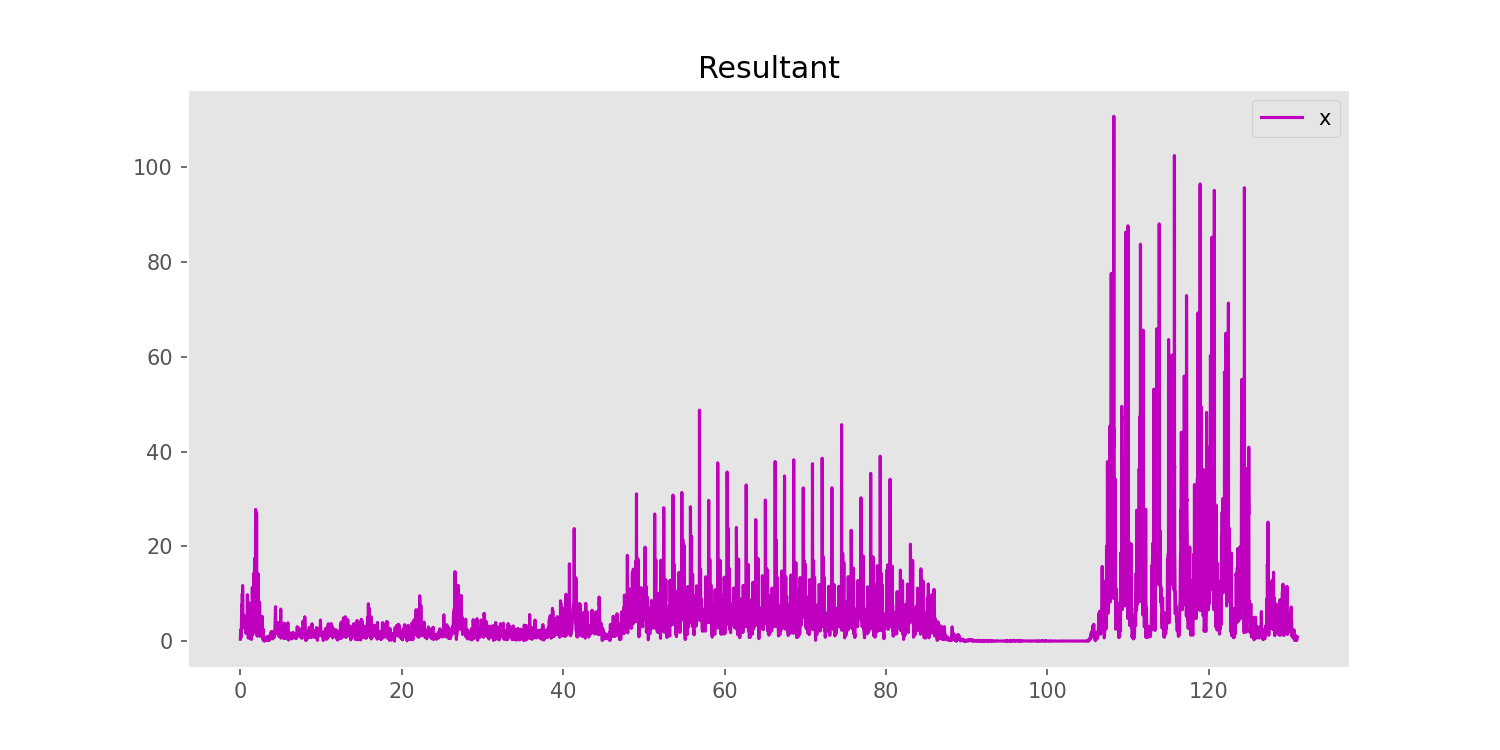

In [7]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import pylab as pl
from scipy.signal import find_peaks
from scipy.signal import butter, freqz, filtfilt, firwin, iirnotch, lfilter
matplotlib.style.use('ggplot')
%matplotlib notebook



import numpy as np
import math
def pull_data(dir_name, file_name):
    f = open(dir_name + '/' + file_name + '.csv')
    xs = []
    ys = []
    zs = []
    rs = []
    timestamps = []
    f.readline() # ignore headers
    for line in f:
        value = line.split(',')
        if len(value) > 3:
            timestamps.append(float(value[-4])) 
            x = float(value[-1])
            y = float(value[-2])
            z = float(value[-3])
            r = math.sqrt(x ** 2 + y ** 2 + z ** 2)
            xs.append(x)
            ys.append(y)
            zs.append(z)
            rs.append(r)
    return np.array(xs), np.array(ys), np.array(zs), np.array(rs), np.array(timestamps)


# read accelerometer data file
accel_file = '/Users/harsh'
x_data, y_data, z_data, signal, timestamps = pull_data(accel_file, 'finaltest1')

c = timestamps[0]
timestamps = (timestamps - c)



# FILL IN CODE: Calculate and plot magnitude
plt.figure(figsize=(10,5))
pl.plot(timestamps, signal, 'm-',label='x')
pl.legend()
plt.title('Resultant')
pl.grid()
pl.show()
